# TensorFlow

참고 : TensorFlow Machine Learning Cookbook

In [1]:
import tensorflow as tf
sess = tf.Session()

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 데밍 회귀 구현
> 최소 제곱 값 선형 회귀가 직선까지의 수직 거리를 최소화하는 반면, 데밍 회귀는 직선까지의 전체 거리를 최소화한다. <br>
> y 값과 x 값의 오차를 같이 최소화한다.

In [3]:
# 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# 일괄 작업 크기 선언
batch_size = 50

# 플레이스홀더 및 변수 생성
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 모델 선언
model_output = tf.add(tf.matmul(x_data, A), b)

# 비용 함수 생성
demming_numerator = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, A), b)))
demming_denominator = tf.sqrt(tf.add(tf.square(A),1))
loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))

# 최적화 함수 선언
my_opt = tf.train.GradientDescentOptimizer(0.1)
train_step = my_opt.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()
sess.run(init)

# 모델 학습
loss_vec = []

for i in range(250):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vec.append(temp_loss)
    
    if (i+1) % 50 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss) + '\n')

Step #50 A = [[-3.9403138]] b = [[1.1894909]]
Loss = 2.4091523

Step #100 A = [[-4.8601875]] b = [[2.291244]]
Loss = 1.8686786

Step #150 A = [[-5.374159]] b = [[3.2480752]]
Loss = 1.7594453

Step #200 A = [[-5.6798177]] b = [[4.1369104]]
Loss = 1.4708469

Step #250 A = [[-5.834271]] b = [[4.9899683]]
Loss = 1.2291313



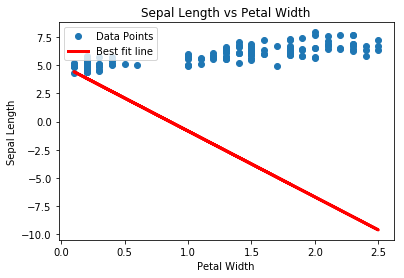

In [4]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []

for i in x_vals:
    best_fit.append(slope * i + y_intercept)

plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

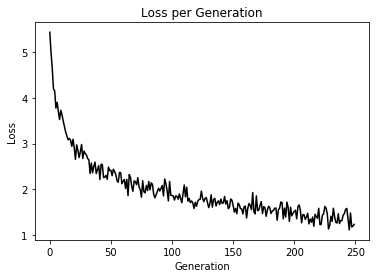

In [5]:
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()